In [1]:
import scanpy as sc
import anndata as ad
import numpy as np

#### **load data**

In [ ]:
# emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/subset_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


#### **metadatas de adata**

In [ ]:
#Scanpy affiche un résumé structuré
adata

AnnData object with n_obs × n_vars = 60000 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [4]:
print("les dimensions de adata sont :",adata.shape)

les dimensions de adata sont : (60000, 34176)


In [ ]:
print("les keys de adata.obs :",adata.obs.keys())
adata.obs.head()

les keys de adata.obs : Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_1386-2-ACGGTTAAGAGCATAT-1,R,5645,15585.0,EN,EN_L3_5_IT_2,EN_L3_5_IT_2_MET,UBERON:0009834,tissue,EFO:0009922,CL:4023040,...,African,MONDO:0001627 || MONDO:0004975,L2/3-6 intratelencephalic projecting glutamate...,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,0(Wln>Dl7^
Donor_1449-2-TTACGCCTCACCGGGT-1,R,9079,44013.0,EN,EN_L5_6_NP,EN_L5_6_NP,UBERON:0009834,tissue,EFO:0009922,CL:4030067,...,African,MONDO:0001627 || MONDO:0004975 || MONDO:0005015,L5/6 near-projecting glutamatergic neuron,10x 3' v3,dementia || Alzheimer disease || diabetes mell...,male,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,BaX^=uu8Xq
Donor_604-2-AACAGGGAGTCGAGGT-1,R,2371,4435.0,IN,IN_VIP,IN_VIP_BCL11B,UBERON:0009834,tissue,EFO:0009922,CL:4023016,...,African,MONDO:0001627 || MONDO:0004975,VIP GABAergic cortical interneuron,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,zrOG~MydR8
Donor_785-1-TCGGATAGTGATGAAT-0,R,1451,2080.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,unknown,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,67-year-old stage,YtYlAzGk*N
Donor_522-1-ACGTCCTAGTCATCGT-1,R,5460,18657.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975 || MONDO:0005180,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease || Parkinson dis...,female,dorsolateral prefrontal cortex,unknown,73-year-old stage,`a$3U<MDTv


In [6]:
# métadonnées gènes 
print("adata.var.keys :",adata.var.keys())
adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


,gene_name,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000000003,TSPAN6,256237,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,TNMD,21369,False,TNMD,NCBITaxon:9606,gene,873,protein_coding


##### **UMAP : just to compare with our results**

In [7]:
# embeddings (UMAP, PCA...)
print("adata.obsm.keys :",adata.obsm.keys())
# informations diverses
print("adata.uns.keys :",adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


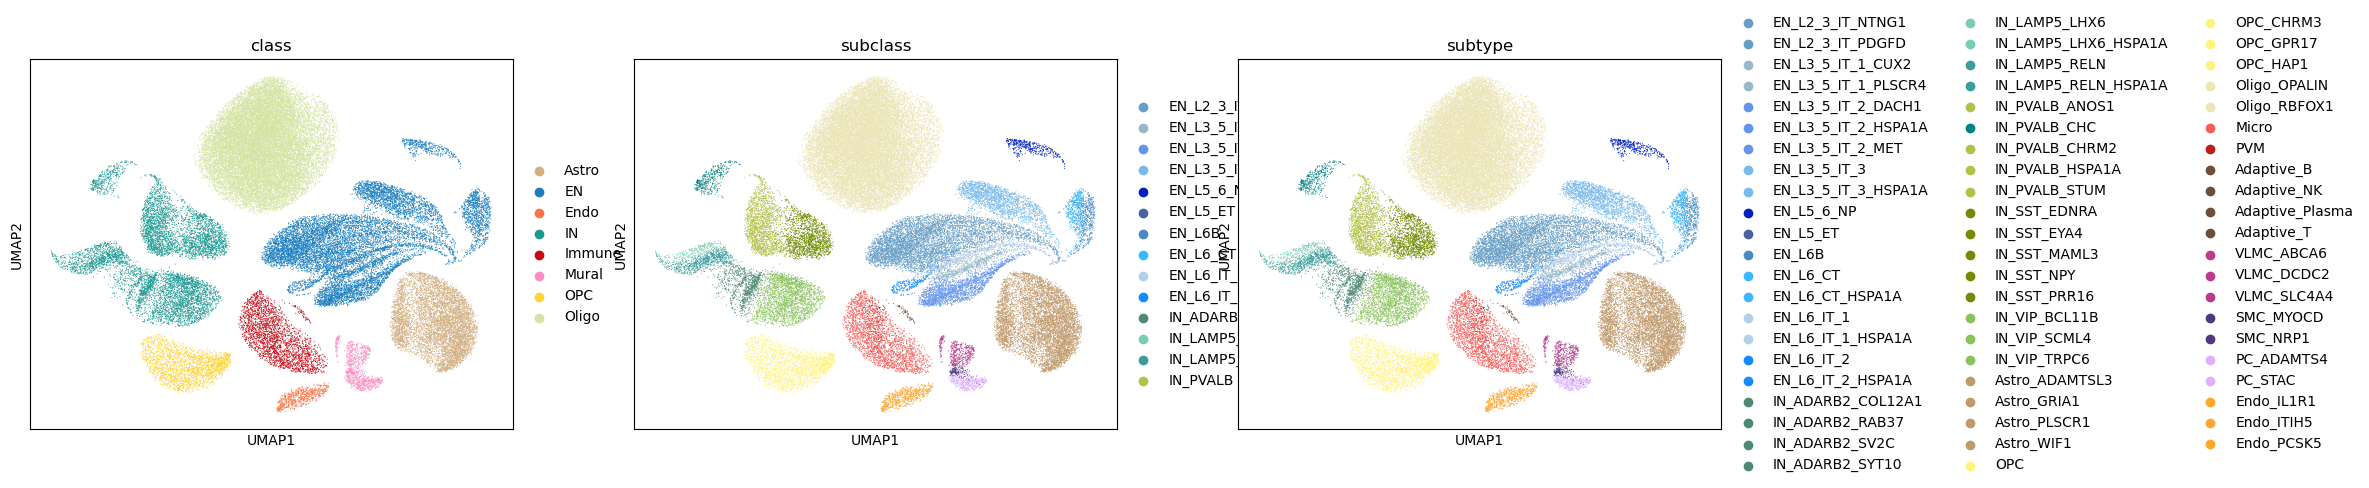

In [8]:
# sc.pl.umap(adata, color='cell_type')
# sc.pl.umap(adata, color='disease')
# sc.pl.umap(adata, color='AD_status')
# sc.pl.umap(adata, color='sex')
# sc.pl.umap(adata, color='subclass')
# sc.pl.umap(adata, color=['cell_type', 'subclass'])
sc.pl.umap(adata, color=['class', 'subclass', 'subtype'])

#### **RNAseq pipeline**

note pour elodie : 
à faire maintenant : 
- regarder comment on peut proceed (avec quelles data on commence, genre avec quelle fonction dans scanpy (le .pp?))
- regarder si on recommence du coup depuis le QC ou direct à la normalisation? 
- chercher pour la DE 
- biblio sur comment faire tout ca
- se poser les questions sur ce qu'on pourrait montrer au prof au tutoring

In [ ]:
# Normalisation
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# HVG
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

# Restreindre aux HVG
adata = adata[:, adata.var['highly_variable']]

# PCA (30 PCs suffisent)
sc.tl.pca(adata, n_comps=30, svd_solver='arpack')

# Voisinages
sc.pp.neighbors(adata, n_pcs=30)

# UMAP
sc.tl.umap(adata, min_dist=0.4)

# clustering
sc.tl.leiden(adata, resolution=0.5)

# Plot
sc.pl.umap(adata, color=['cell_type', 'disease', 'leiden'])

/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca
/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ImportError: Please install the igraph package: `conda install -c conda-forge python-igraph` or `pip3 install igraph`.